In [1]:
# pip install PySimpleGUI

In [2]:
#printing table




import PySimpleGUI as sg
import csv
    

def table_example(filename): #define the function that creates a table from an input file
    if filename == '':
        return
    data = []
    header_list = []
    button = sg.popup_yes_no('', 'Does this file have column names already?', '') #check if input file already has column names
    if filename is not None: 
        with open(filename, "r") as infile:
            reader = csv.reader(infile)
            if button == 'Yes':  #if yes, take the column names from the file
                header_list = next(reader)
            try:
                data = list(reader)
                if button == 'No':  #if not, name the columns as column0,column1 etc.
                    header_list = ['column' + str(x) for x in range(len(data[0]))]
            except:
                sg.popup_error('Error reading file')
                return
            
    #create a plot 
    #df=pd.read_csv(filename)
    #fig=px.line(df,x = header_list[1],y = header_list[2], title = 'Plot Example')
    #fig.show() #FIX THIS PART TO GET THE PLOT

    
    #create a window to show the table
    layout = [[sg.Table(values=data,
                        headings=header_list,
                        max_col_width = 25,
                        auto_size_columns=True,
                        justification='right',
                        num_rows=min(len(data), 60))]]


    window = sg.Window('Table', layout, grab_anywhere=False, resizable = False)
    event, values = window.read()

    window.close()



Your Mac patches are:
Modal windows disabled: True
No titlebar patch: False
No grab anywhere allowed with titlebar: True
Currently the no titlebar patch WILL NOT be applied


In [3]:
import PySimpleGUI as sg

def xparameter(header):
    layout = [
                        [sg.Text('Select parameter on X-axis: ')],
                        [sg.Radio(text, 2) for text in header],
                        [sg.B('Plot'), sg.B('Exit')]
                    ]

    window = sg.Window('', layout)

    event, values = window.read()
    # if event == sg.WIN_CLOSED or event == 'Exit':  # always,  always give a way out!
    #     break
    if event == 'Plot':
        for i, val in values.items():  
            if val == True:
                window.close()
                return i
    window.close()

In [4]:
#plotting graph




import PySimpleGUI as sg
import numpy as np
import pandas as pd
import csv

import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk


def plot_graph(filename):
    
    
    # ---------- toolbar code starts
    
    def draw_figure_w_toolbar(canvas, fig, canvas_toolbar):
        if canvas.children:
            for child in canvas.winfo_children():
                child.destroy()
        if canvas_toolbar.children:
            for child in canvas_toolbar.winfo_children():
                child.destroy()
        figure_canvas_agg = FigureCanvasTkAgg(fig, master=canvas)
        figure_canvas_agg.draw()
        toolbar = Toolbar(figure_canvas_agg, canvas_toolbar)
        toolbar.update()
        figure_canvas_agg.get_tk_widget().pack(side='right', fill='both', expand=1)


    class Toolbar(NavigationToolbar2Tk):
        def __init__(self, *args, **kwargs):
            super(Toolbar, self).__init__(*args, **kwargs)

    # --------- ends
            
        
        
            
    
    # -------------- Reading csv file
    df = pd.read_csv(filename)       
    arr = df.to_numpy()

    header = list(df.columns)
    print(header)
    
    
    
    
    # ------------------------------- PySimpleGUI CODE
    layout = [
        [sg.Column(
            layout = [
                [sg.Text('Select parameter on Y-axis: ')],
            [sg.Radio(text, 2) for text in header]
            ]
        )],
        [sg.B('Plot'), sg.B('Exit')],
        [sg.T('Controls:')],
        [sg.Canvas(key='controls_cv')],
        [sg.T('Figure:')],
        [sg.Column(
            layout=[
                [sg.Canvas(key='fig_cv',
                           # it's important that you set this size
                           size=(400 * 2, 400)
                           )]
            ],
            background_color='#DAE0E6',
            pad = (0, 0)
        )],
        ]

    window = sg.Window('Graph', layout)

    while True:
        event, values = window.read()
        if event == sg.WIN_CLOSED or event == 'Exit':  # always,  always give a way out!
            break
        elif event == 'Plot':            
            
            # ------ searching selected header 
            idx_y = -1
            for i, val in values.items():  
                if val == True:
                    idx_y = i

            
            
            plt.figure(1)
            fig = plt.gcf()
            DPI = fig.get_dpi()
            # ---------------------- you have to play with this size to reduce the movement error when the mouse hovers over the figure, it's close to canvas size
            fig.set_size_inches(404 * 2 / float(DPI), 404 / float(DPI))
            # ----------------------
            
            
            idx_x = -1
            
            button = sg.popup_yes_no('', 'Do you want to change parameter on X-axis from default', '')
            if button == 'Yes':
                idx_x = xparameter(header)


                
            x = []
            if idx_x == -1:
                x = np.arange(0, len(arr[:, 0]), 1)
            else:
                x = arr[:, idx_x]
                
            y = arr[:, idx_y]

            plt.figure(figsize = (500, 100))
            
            plt.plot(x, y)
            if(idx_x == -1):
                plt.xlabel('time(s)')
            else:
                plt.xlabel(header[idx_x])
            plt.ylabel(header[idx_y])
            fig = plt.gcf()
            
            # ------------------- Instead of plt.show()
            draw_figure_w_toolbar(window['fig_cv'].TKCanvas, fig, window['controls_cv'].TKCanvas)
            
    window.close()
    exit()
    
    
# plot_graph("/Users/akshitrathore/Desktop/medical_examination.csv")

In [5]:
#choices



import PySimpleGUI as sg
from pathlib import Path


def choices(filename):
    
    if Path(filename).suffix != '.csv':
        sg.popup('', 'Please select a csv file', '')
        return
    
    
    radio_choices = ['Print table', 'Plot graph']
    radio = [[sg.Radio(text, 1),] for text in radio_choices]
    layout = [[sg.Text('Select option')]] + radio + [[sg.OK(), sg.Cancel()]]

    window = sg.Window('', layout, size = (350, 125))
    
    while True:
        event, values = window.Read()
        if event == 'Cancel' or event == sg.WIN_CLOSED:
            break
        if event == 'OK':
            window.close()
            if values[0] == True:
                table_example(filename)
            else:
                plot_graph(filename)
    window.close()
    exit()

* Error performing wm_overrideredirect while hiding the hidden master root* expected boolean value but got ""
['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


<Figure size 808x404 with 0 Axes>

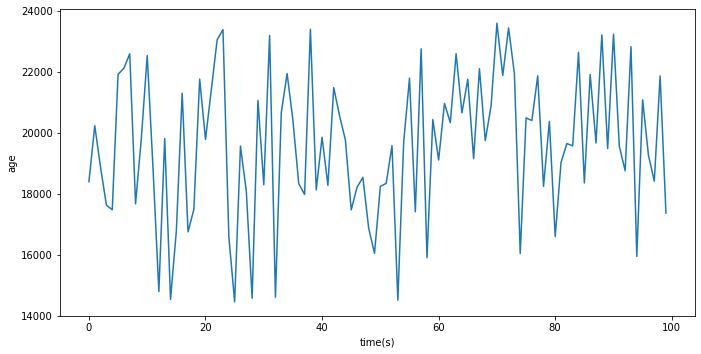

In [6]:
#main



import PySimpleGUI as sg
import csv
#import pandas as pd
#import plotly.express as px


#create a window for choosing input file
sg.theme('SystemDefault')

layout = [[sg.T("")], [sg.Text("Input File Path: ")], [sg.Input(), sg.FileBrowse()],
          [sg.T("")], [sg.OK()]
         ]

window = sg.Window('File Browser', layout, size = (600,250))

while True:
    event, values = window.read()
    #end program if user closes window
    if event == sg.WIN_CLOSED:
        break
    #start with function table_example() to create a table from an input is user clicks on Begin!
    if event == 'OK':
        filename = values[0]    # 0 and 1 are keys of dictionary `values`
        choices(filename) #take input data and create a table

window.close()
exit()